Social media has changed the world and gave individuals the opportunity to be heard and have an impact on society. In the past few years we have been witnessing a growing number of movements, protests and phenomena that started in social media.

This opportunity has its downsides too. The social media can provide a platform for spreading hate, racism, sexism and has a real potential of hurting people. Freedom of speech is important, but sometimes, detecting and preventing this type of content from being published is a must.

Using Kaggle, I extracted Tweets that are classified as hate tweets and regular tweets. In this case, hate tweets are considered as tweets with racist and sexist context. My intent is to train a model that will have the ability to analyze the tweet and label it efficiently.

In [1]:
#Let's start with importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import warnings 
warnings.filterwarnings(action = 'ignore') 
import re
from keras.models import Model, Sequential
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Flatten, Embedding
from keras.optimizers import Adam
import multiprocessing
from matplotlib import pyplot
from sklearn.decomposition import PCA
from keras.utils import plot_model
from gensim.models import Word2Vec
%matplotlib inline

Using TensorFlow backend.


In [2]:
#loading the csv file we extracted for kaggle
df = pd.read_csv('twitter_sentiment_analysis_train.csv')

In [3]:
df.shape

(31962, 3)

In [4]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
df.groupby('label')['tweet'].count()

label
0    29720
1     2242
Name: tweet, dtype: int64

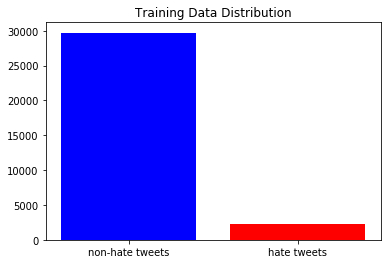

In [6]:
#Creating a plot of the tweets distribution
plt.bar(['non-hate tweets','hate tweets'], df.groupby('label')['tweet'].count(), color=['b', 'r']);
plt.title('Training Data Distribution');

In [7]:
def text_clean_and_tokenize(text):
    '''
    removes redundant spaces, removes non english characters, and creates space after every uppercase letter,
    performing text lemmatization and tokenization 
    
    Input: text (only type str)
    Output: clean and tokenized text
    
    '''
    #Creting space between punctuations and removing the punctuations 
    text  = "".join((char if char.isalpha() else " ") for char in text)
    text = re.sub('[\W_]+', ' ', text)
    #Removing extra spaces
    text = re.sub(' +', ' ',text)
    text = text.strip()
    #Converting uppercase letters to lowercase
    text = text.lower()
    #tokenization of words (creating a list of words)
    text = re.split('\W+', text)
    
    #Lemmatization on words
    ps = nltk.WordNetLemmatizer()
    text = [ps.lemmatize(w) for w in text]
  
    return text

In [8]:
#performing text cleaning and tokenizing all the tweets in the dataset
df['tokenized_tweets'] = df['tweet'].apply(lambda x: text_clean_and_tokenize(x))

In [9]:
df.head()

,id,label,tweet,tokenized_tweets
0,1,0,@user when a father is dysfunctional and is s...,"[user, when, a, father, is, dysfunctional, and..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[user, user, thanks, for, lyft, credit, i, can..."
2,3,0,bihday your majesty,"[bihday, your, majesty]"
3,4,0,#model i love u take with u all the time in ...,"[model, i, love, u, take, with, u, all, the, t..."
4,5,0,factsguide: society now #motivation,"[factsguide, society, now, motivation]"


In [10]:
#Creating a Word2Vec model out of all our tokenized text columns
model = Word2Vec(df['tokenized_tweets'], size = 100, window = 20, min_count = 2, negative = 20, iter=25, workers=multiprocessing.cpu_count())

In [11]:
#Intisiating the words vocabulary
word_vectors = model.wv

In [12]:
#Saving the model we created
model.wv.save_word2vec_format('Word_2_Vec_sentiment_analysis.txt', binary=False)

In [13]:
#Exploring similarity between words to test our model
word_vectors.similar_by_word("hate")

[('stupid', 0.5845484733581543),
 ('blame', 0.550693690776825),
 ('lgbt', 0.541233241558075),
 ('hateful', 0.5392723679542542),
 ('violence', 0.5130387544631958),
 ('agenda', 0.5096701979637146),
 ('maga', 0.5058462023735046),
 ('equality', 0.5037320256233215),
 ('kill', 0.5032801032066345),
 ('pathetic', 0.49251115322113037)]

In [14]:
print(model.wv.similarity('sexist', 'woman'))

0.44370776


In [15]:
#performing semantic differences
print(model.wv.most_similar(positive=['peace', 'freedom'], negative=['war']))

[('trust', 0.5451172590255737), ('kindness', 0.5281391739845276), ('amen', 0.5040910243988037), ('spirituality', 0.497775673866272), ('vlicobs', 0.49765175580978394), ('positivity', 0.49580153822898865), ('mâ', 0.473218709230423), ('passion', 0.471571683883667), ('xoxo', 0.47136247158050537), ('future', 0.47030675411224365)]


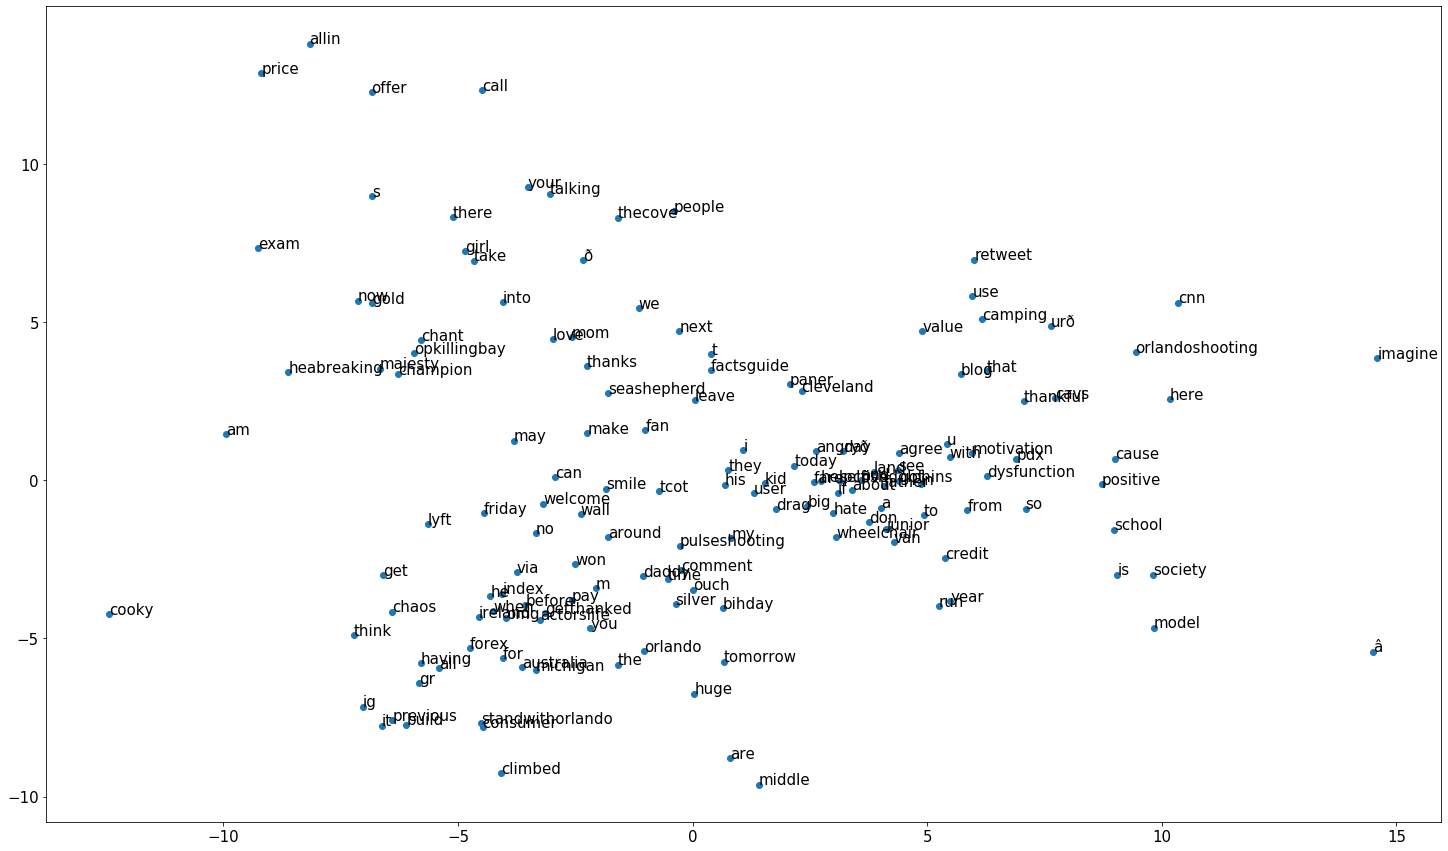

In [16]:
#create a plot for the 150 most frequent words
X = model[model.wv.index2entity[:150]]
pca = PCA(n_components=2)
result = pca.fit_transform(X)[:150]
# create a scatter plot of the projection
pyplot.figure(figsize=(25,15))
pyplot.rcParams.update({'font.size': 15});
pyplot.scatter(result[:, 0], result[:, 1]);
words = list(model.wv.vocab)[:150]
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
    
pyplot.show()

In [17]:
def text_cleaning(text):
    '''
    removes redundant spaces, removes non english characters, and creates space after every uppercase letter,
    performing text lemmatization and tokenization 
    
    Input: text (only type str)
    Output: clean text
    
    '''
    #Creting space between punctuations and removing the punctuations 
    text  = "".join((char if char.isalpha() else " ") for char in text)
    text = re.sub('[\W_]+', ' ', text)
    #Removing extra spaces
    text = re.sub(' +', ' ',text)
    text = text.strip()
    #Converting uppercase letters to lowercase
    text = text.lower()
    #tokenization of words (creating a list of words)
    text = re.split('\W+', text)
    
    #Lemmatization on words
    ps = nltk.WordNetLemmatizer()

    text = ' '.join([ps.lemmatize(w) for w in text])
  
    return text

In [18]:
df['clean_tweets'] = df['tweet'].apply(lambda x: text_cleaning(x))

In [19]:
df.head()

,id,label,tweet,tokenized_tweets,clean_tweets
0,1,0,@user when a father is dysfunctional and is s...,"[user, when, a, father, is, dysfunctional, and...",user when a father is dysfunctional and is so ...
1,2,0,@user @user thanks for #lyft credit i can't us...,"[user, user, thanks, for, lyft, credit, i, can...",user user thanks for lyft credit i can t use c...
2,3,0,bihday your majesty,"[bihday, your, majesty]",bihday your majesty
3,4,0,#model i love u take with u all the time in ...,"[model, i, love, u, take, with, u, all, the, t...",model i love u take with u all the time in urð...
4,5,0,factsguide: society now #motivation,"[factsguide, society, now, motivation]",factsguide society now motivation


In [20]:
#Converting all tokenized words into constant numbers
texts = df['clean_tweets']
tokenizer = Tokenizer(nb_words=14225)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [21]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 37391 unique tokens.


In [22]:
MAX_NB_WORDS = len(word_index)+1

In [23]:
#Pad the dataset with 0 in the missing spaces 
data = pad_sequences(sequences, maxlen=280)
data_length = data.shape[1]

In [24]:
labels = df['label']

In [25]:
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (31962, 280)
Shape of label tensor: (31962,)


In [26]:
# split the data into a training set and a validation set
VALIDATION_SPLIT = 0.2
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])
x_train = data[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_val = data[-nb_validation_samples:]
y_val = labels[-nb_validation_samples:]

In [29]:
#Opening the Word2Vec model I created and assigning each word in the dataset to its corresponding vector
embeddings_index = {}
f = open('Word_2_Vec_sentiment_analysis.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))


embedding_matrix = np.zeros((len(word_index) + 1, 100))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

Found 14226 word vectors.


In [30]:
vocab_size = embedding_matrix.shape[0]

In [31]:
#Testing the embeddings index
embeddings_index['hate']

array([ 1.7425034 ,  0.8459206 ,  1.9137139 , -0.33128756, -1.5907221 ,
        2.015965  ,  0.16864045, -0.6158594 , -1.6495322 , -0.78474605,
       -2.5494163 , -1.1480516 ,  0.14123559, -5.6025367 ,  0.6564359 ,
        2.419941  ,  0.48720783,  0.7628578 ,  0.72785425,  3.3380551 ,
        1.6903839 , -0.58642733,  1.0664028 , -2.7877584 , -0.85917604,
        3.5000212 ,  1.093444  , -1.0988823 ,  0.61426723,  1.8155472 ,
        0.2674514 ,  1.4840056 ,  1.044791  ,  1.9552481 ,  0.830462  ,
        0.6270268 ,  1.9521562 ,  2.236616  , -2.2534537 ,  0.40452594,
       -4.14118   , -1.4728775 , -0.01638091, -0.37630194, -0.551468  ,
       -0.9015885 , -1.7663898 , -1.1105192 , -0.8241339 , -2.4488518 ,
       -1.3092519 ,  0.04708765,  3.0188558 , -0.05792954,  2.7934945 ,
        1.22429   , -2.7353425 ,  2.2169325 ,  3.0972474 , -0.06535855,
       -2.1273212 ,  0.34920743, -1.9474927 , -2.2612448 ,  3.5349853 ,
       -0.02264556, -4.9004164 , -0.76780856, -0.1940777 , -0.02

In [32]:
#Intatiating the model, creating the embedded layer, compiling the model and summarizing it
model_2 = Sequential()
e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=data_length, trainable=False)
model_2.add(e)
model_2.add(Flatten())
model_2.add(Dense(1, activation='sigmoid'))

opt = Adam(lr=0.00001)

model_2.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 280, 100)          3739200   
_________________________________________________________________
flatten_1 (Flatten)          (None, 28000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 28001     
Total params: 3,767,201
Trainable params: 28,001
Non-trainable params: 3,739,200
_________________________________________________________________


In [33]:
# happy learning!
history = model_2.fit(x_train, y_train, validation_data=(x_val, y_val),
          epochs=50, batch_size=120)

Train on 25570 samples, validate on 6392 samples
Epoch 1/50
25570/25570 [==============================] - 3s 121us/step - loss: 0.6612 - accuracy: 0.6069 - val_loss: 0.5799 - val_accuracy: 0.7315
Epoch 2/50
25570/25570 [==============================] - 2s 93us/step - loss: 0.5213 - accuracy: 0.8011 - val_loss: 0.4801 - val_accuracy: 0.8423
Epoch 3/50
25570/25570 [==============================] - 2s 83us/step - loss: 0.4466 - accuracy: 0.8675 - val_loss: 0.4231 - val_accuracy: 0.8861
Epoch 4/50
25570/25570 [==============================] - 2s 82us/step - loss: 0.4013 - accuracy: 0.8940 - val_loss: 0.3862 - val_accuracy: 0.9047
Epoch 5/50
25570/25570 [==============================] - 2s 84us/step - loss: 0.3706 - accuracy: 0.9072 - val_loss: 0.3601 - val_accuracy: 0.9141
Epoch 6/50
25570/25570 [==============================] - 2s 84us/step - loss: 0.3476 - accuracy: 0.9151 - val_loss: 0.3400 - val_accuracy: 0.9191
Epoch 7/50
25570/25570 [==============================] - 2s 84us/st

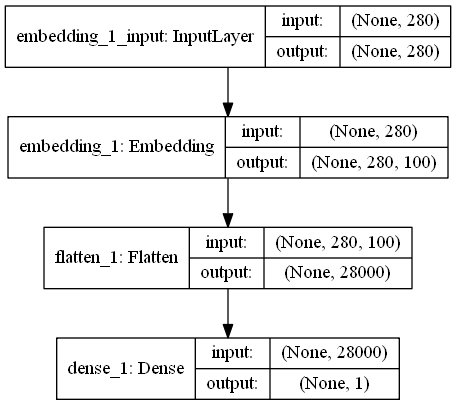

In [34]:
#ploting the model and its structure
plot_model(model_2, show_shapes=True)

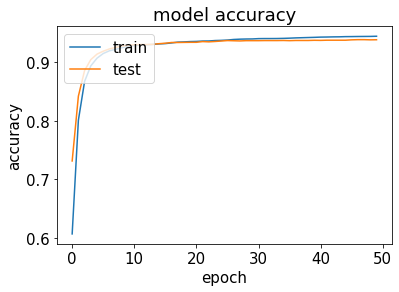

In [35]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

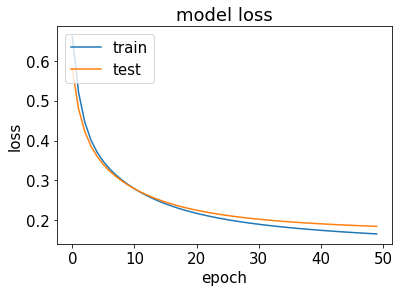

In [36]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
# evaluate the model
loss, accuracy = model_2.evaluate(x_val, y_val, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 93.867332


In [38]:
#Creating predictions for our validation set and adding it to the dataset for a better comparison
predictions = model_2.predict_classes(x_val)
df_eval = df.ix[list(y_val.index.values)]
df_eval['predictions'] = predictions
df_eval[df_eval['predictions'] ==1]

,id,label,tweet,tokenized_tweets,clean_tweets,predictions
30758,30759,0,google has bn racist for ages...d world is jus...,"[google, ha, bn, racist, for, age, d, world, i...",google ha bn racist for age d world is just ca...,1
1463,1464,1,tyler perry claims âreverse racismâ by cri...,"[tyler, perry, claim, â, reverse, racismâ, by,...",tyler perry claim â reverse racismâ by critic ...,1
26273,26274,1,#people aren't protesting #trump because a #re...,"[people, aren, t, protesting, trump, because, ...",people aren t protesting trump because a repub...,1
28294,28295,1,@user #newyear 'wish list' of cretin #carlpal...,"[user, newyear, wish, list, of, cretin, carlpa...",user newyear wish list of cretin carlpaladino ...,1
23690,23691,0,"#aap, #congress hell bent on vitiating communa...","[aap, congress, hell, bent, on, vitiating, com...",aap congress hell bent on vitiating communal h...,1
...,...,...,...,...,...,...
11458,11459,1,@user @user @user because many of us find obam...,"[user, user, user, because, many, of, u, find,...",user user user because many of u find obama s ...,1
19122,19123,1,black upenn freshmen added to racist social me...,"[black, upenn, freshman, added, to, racist, so...",black upenn freshman added to racist social me...,1
9753,9754,1,@user #allahsoil police kill a substantially l...,"[user, allahsoil, police, kill, a, substantial...",user allahsoil police kill a substantially lar...,1
8302,8303,0,~he forgot to put: sponsored by cair â¢ â¢...,"[he, forgot, to, put, sponsored, by, cair, â, ...",he forgot to put sponsored by cair â â wakeupa...,1


In [43]:
#An example of tweet that classified as hate tweet by the model and wasn't label this way in the dataset
df_eval['tweet'][30758]

'google has bn racist for ages...d world is just catching on...  '

# Pre-Trained GloVe Embedding
Now I'll do the same, but this time, using a pre trained GloVe Embedding and test the results

In [44]:
#Opening the GloVe model and assigning each word in the dataset to its corresponding vector
embeddings_index = {}
f = open('glove.6B.100d.txt', encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [45]:
embedding_matrix = np.zeros((len(word_index) + 1, 100))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [46]:
len(word_index) + 1

37392

In [47]:
vocab_size = embedding_matrix.shape[0]

In [48]:
vocab_size

37392

In [49]:
#Testing the embeddings index
embeddings_index['hate']

array([ 0.17659  ,  0.50064  ,  0.0088315, -1.0508   , -0.16269  ,
        1.2352   , -0.59918  , -0.63878  ,  0.53806  ,  0.27061  ,
       -0.34867  ,  0.080632 , -0.47525  ,  0.0038664,  0.44793  ,
        0.16638  , -0.16975  ,  0.26788  , -0.8065   ,  0.87468  ,
        0.55568  ,  0.14944  , -0.1657   , -0.55191  ,  0.065539 ,
        0.11676  ,  0.44888  , -0.30606  ,  0.34267  , -0.29187  ,
        0.41492  ,  0.79645  ,  0.34349  ,  0.22112  , -0.17078  ,
       -0.18531  ,  0.11219  , -0.36115  ,  0.59638  ,  0.30354  ,
       -0.71878  , -0.024002 , -0.36848  , -0.48278  , -0.54718  ,
       -0.48508  ,  0.45822  , -0.21857  , -0.219    , -1.3933   ,
        0.65796  ,  0.45913  , -0.58279  ,  0.48452  , -0.29622  ,
       -0.85992  ,  1.063    ,  0.54207  ,  1.0812   , -0.28798  ,
       -0.18865  ,  0.58522  , -0.29666  , -1.3604   ,  0.5092   ,
        0.80366  ,  1.1011   ,  0.38638  ,  0.22916  ,  0.069255 ,
        0.25114  , -0.73256  , -0.17292  ,  0.12404  , -0.6207

In [50]:
#Intatiating the model, creating the embedded layer, compiling the model and summarizing it
model_2 = Sequential()
e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=data_length, trainable=False)
model_2.add(e)
model_2.add(Flatten())
model_2.add(Dense(1, activation='sigmoid'))

opt = Adam(lr=0.00001)

model_2.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 280, 100)          3739200   
_________________________________________________________________
flatten_2 (Flatten)          (None, 28000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 28001     
Total params: 3,767,201
Trainable params: 28,001
Non-trainable params: 3,739,200
_________________________________________________________________


In [51]:
# happy learning!
history = model_2.fit(x_train, y_train, validation_data=(x_val, y_val),
          epochs=50, batch_size=120)

Train on 25570 samples, validate on 6392 samples
Epoch 1/50
25570/25570 [==============================] - 2s 97us/step - loss: 0.6188 - accuracy: 0.7630 - val_loss: 0.5409 - val_accuracy: 0.9018
Epoch 2/50
25570/25570 [==============================] - 2s 79us/step - loss: 0.4916 - accuracy: 0.9121 - val_loss: 0.4477 - val_accuracy: 0.9218
Epoch 3/50
25570/25570 [==============================] - 2s 88us/step - loss: 0.4218 - accuracy: 0.9221 - val_loss: 0.3945 - val_accuracy: 0.9279
Epoch 4/50
25570/25570 [==============================] - 2s 90us/step - loss: 0.3808 - accuracy: 0.9245 - val_loss: 0.3617 - val_accuracy: 0.9288
Epoch 5/50
25570/25570 [==============================] - 2s 80us/step - loss: 0.3548 - accuracy: 0.9257 - val_loss: 0.3400 - val_accuracy: 0.9293
Epoch 6/50
25570/25570 [==============================] - 2s 85us/step - loss: 0.3371 - accuracy: 0.9263 - val_loss: 0.3249 - val_accuracy: 0.9294
Epoch 7/50
25570/25570 [==============================] - 2s 78us/ste

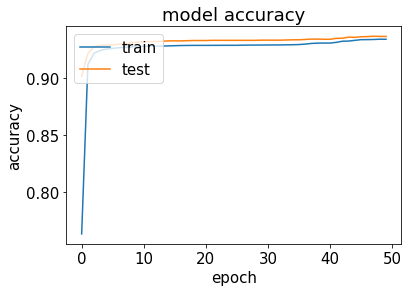

In [52]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

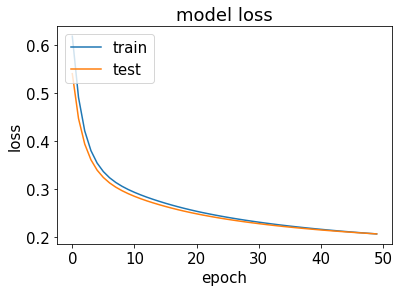

In [53]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [54]:
# evaluate the model
loss, accuracy = model_2.evaluate(x_val, y_val, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 93.679601


In [55]:
#Creating a new predictions for our validation set and adding it to the dataset for a better comparison
predictions = model_2.predict_classes(x_val)
df_eval['predictions_GloVe'] = predictions
df_eval[df_eval['predictions_GloVe'] ==1]

,id,label,tweet,tokenized_tweets,clean_tweets,predictions,predictions_GloVe
31742,31743,1,@user you might be a libtard if... #libtard #...,"[user, you, might, be, a, libtard, if, libtard...",user you might be a libtard if libtard sjw lib...,1,1
20222,20223,1,in the case of the commonwealth of the interne...,"[in, the, case, of, the, commonwealth, of, the...",in the case of the commonwealth of the interne...,0,1
28727,28728,1,@user #trump is guilty of treason ! we #there...,"[user, trump, is, guilty, of, treason, we, the...",user trump is guilty of treason we theresistan...,1,1
11303,11304,1,@user @user @user @user says a president elect...,"[user, user, user, user, say, a, president, el...",user user user user say a president elect that...,1,1
12064,12065,1,@user racist austin police ofc cameron staff ...,"[user, racist, austin, police, ofc, cameron, s...",user racist austin police ofc cameron staff ca...,1,1
9462,9463,1,you might be a libtard if... #libtard #sjw #l...,"[you, might, be, a, libtard, if, libtard, sjw,...",you might be a libtard if libtard sjw liberal ...,1,1
20787,20788,1,@user #allahsoil most deaths caused by islamic...,"[user, allahsoil, most, death, caused, by, isl...",user allahsoil most death caused by islamic ex...,1,1
15466,15467,1,you might be a libtard if... #libtard #sjw #l...,"[you, might, be, a, libtard, if, libtard, sjw,...",you might be a libtard if libtard sjw liberal ...,1,1
15740,15741,1,@user #allahsoil the term jihad is a highly-co...,"[user, allahsoil, the, term, jihad, is, a, hig...",user allahsoil the term jihad is a highly cont...,1,1
29625,29626,1,@user #allahsoil many politicians claim that j...,"[user, allahsoil, many, politician, claim, tha...",user allahsoil many politician claim that jiha...,1,1


# Summary
As we can see, Word Embedding is a great method for semantic analysis that can perform very well in classifying tweets. We can also take in consideration the short run time and the fast learning curve. 